In [165]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

digits = load_digits()
print(digits.keys())
data = digits["data"]
images = digits["images"]
classification = digits["target"]
class_names = digits["target_names"]

print("%d data sets loaded.\n" % len(data))
print("Data shape: %s; dtype: %s" % (np.shape(data), data.dtype))
print("Image shape: %s; dtype: %s" % (np.shape(images), images.dtype))
print("Classification shape: %s; dtype: %s" % (np.shape(classification), classification.dtype))
print("Classes shape: %s; dtype: %s" % (np.shape(class_names), class_names.dtype))
print("\nList of all classes: %s" % class_names)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
1797 data sets loaded.

Data shape: (1797, 64); dtype: float64
Image shape: (1797, 8, 8); dtype: float64
Classification shape: (1797,); dtype: int64
Classes shape: (10,); dtype: int64

List of all classes: [0 1 2 3 4 5 6 7 8 9]


## Data preparation

In [166]:
data = data[(classification == 1) | (classification == 7)]
classification = classification[(classification == 1) | (classification == 7)]

assert len(data) == 361
assert len(classification) == 361
print(f'Filtered dataset size: {len(data)}')

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, classification,
                                                                                    test_size=0.4)

Filtered dataset size: 361


## Dimension Reduction

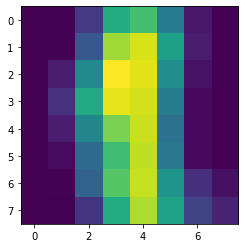

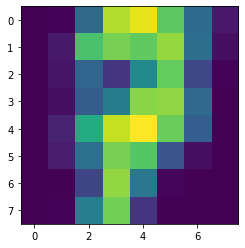

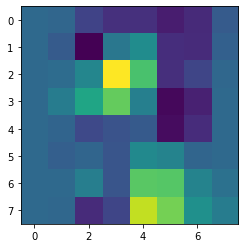

/tmp/ipykernel_27641/2223812956.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  return np.array([0.3 * x[22] + 42 * (x[12] / x[63]), x[32] - x[61]])
/tmp/ipykernel_27641/2223812956.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([0.3 * x[22] + 42 * (x[12] / x[63]), x[32] - x[61]])


In [167]:
data_1 = data[classification == 1]
data_7 = data[classification == 7]

mean_1 = np.mean(data_1, axis=0)
mean_7 = np.mean(data_7, axis=0)
mean_diff = mean_1 - mean_7

mean_ind_1 = np.argpartition(mean_1, -2)[-2:]
mean_ind_7 = np.argpartition(mean_7, -2)[-2:]
mean_ind_diff = np.argpartition(mean_diff, -4)[-4:]

mean_1_plt = mean_1.reshape((8, 8))
mean_7_plt = mean_7.reshape((8, 8))
mean_diff_plt = mean_diff.reshape((8, 8))

plt.imshow(mean_1_plt)
plt.show()
plt.imshow(mean_7_plt)
plt.show()
plt.imshow(mean_diff_plt)
plt.show()


def reduce_with_mean(x):
    return np.array([x[mean_ind_diff[0]], x[mean_ind_diff[1]]])


def reduce_with_exercise_option(x):
    return np.array([0.3 * x[22] + 42 * (x[12] / x[63]), x[32] - x[61]])


def reduce_dim(x_s, reduce_func=reduce_with_exercise_option):
    res = np.empty((len(x_s), 2), dtype=float)
    for i, x in enumerate(x_s):
        res[i] = reduce_func(x)
    return res


train_red = reduce_dim(train_data)
test_red = reduce_dim(test_data)

## Scatter plot

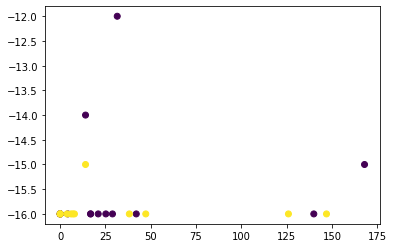

In [168]:
train_red_scatter = np.moveaxis(train_red, 1, 0)
test_red_scatter = np.moveaxis(test_red, 1, 0)

plt.scatter(np.concatenate([train_red_scatter[0], test_red_scatter[0]]),
            np.concatenate([train_red_scatter[1], test_red_scatter[1]]),
            c=np.concatenate((np.full(len(train_red), 0), np.full(len(test_red), 1))))
plt.show()

## Nearest mean

In [169]:
def nearest_mean(training_features, training_labels, test_features):
    ts_1 = training_features[training_labels == 1]
    ts_7 = training_features[training_labels == 7]

    mean_ts_1 = np.mean(ts_1)
    mean_ts_7 = np.mean(ts_7)

    dist_1 = np.sqrt(np.sum((test_features - mean_ts_1) ** 2, axis=1))
    dist_7 = np.sqrt(np.sum((test_features - mean_ts_7) ** 2, axis=1))

    sevens = dist_1 < dist_7
    ones = dist_1 >= dist_7

    return ones * 1 + sevens * 7


predicted_labels = nearest_mean(train_red, train_labels, test_red)
error = test_labels != predicted_labels
error_rate = np.sum(error) / len(error)

print(error_rate)

0.9172413793103448


/tmp/ipykernel_27641/1761926724.py:8: RuntimeWarning: invalid value encountered in subtract
  dist_1 = np.sqrt(np.sum((test_features - mean_ts_1) ** 2, axis=1))
/tmp/ipykernel_27641/1761926724.py:9: RuntimeWarning: invalid value encountered in subtract
  dist_7 = np.sqrt(np.sum((test_features - mean_ts_7) ** 2, axis=1))


## Visualize decision regions

[[[ 0.    0.  ]
  [ 0.    0.08]
  [ 0.    0.16]
  ...
  [ 0.   15.76]
  [ 0.   15.84]
  [ 0.   15.92]]

 [[ 0.08  0.  ]
  [ 0.08  0.08]
  [ 0.08  0.16]
  ...
  [ 0.08 15.76]
  [ 0.08 15.84]
  [ 0.08 15.92]]

 [[ 0.16  0.  ]
  [ 0.16  0.08]
  [ 0.16  0.16]
  ...
  [ 0.16 15.76]
  [ 0.16 15.84]
  [ 0.16 15.92]]

 ...

 [[15.76  0.  ]
  [15.76  0.08]
  [15.76  0.16]
  ...
  [15.76 15.76]
  [15.76 15.84]
  [15.76 15.92]]

 [[15.84  0.  ]
  [15.84  0.08]
  [15.84  0.16]
  ...
  [15.84 15.76]
  [15.84 15.84]
  [15.84 15.92]]

 [[15.92  0.  ]
  [15.92  0.08]
  [15.92  0.16]
  ...
  [15.92 15.76]
  [15.92 15.84]
  [15.92 15.92]]]
[[ 0.    0.  ]
 [ 0.    0.08]
 [ 0.    0.16]
 ...
 [15.92 15.76]
 [15.92 15.84]
 [15.92 15.92]]


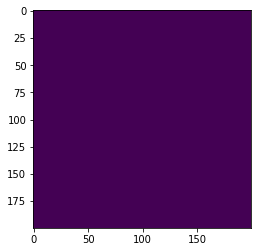

In [170]:
line_size = 200
size = line_size ** 2
vis_test = np.empty((line_size, line_size, 2))
for i in range(200):
    for j in range(200):
        vis_test[i][j][0] = i
        vis_test[i][j][1] = j

vis_test /= 200
vis_test *= 16

vis_test_lin = vis_test.reshape((size, 2))
print(vis_test)
print(vis_test_lin)

pred = nearest_mean(train_red, train_labels, vis_test_lin)
pred_img = pred.reshape((200,200))

plt.imshow(pred_img)
plt.show()
